In [ ]:
# OASM 
#02/11/2024
# DataSet analisis de sentimientos de productos de amazon 1-5
# En el data la pagina obtenida del dataset manejan los datos como
# 1-3 como negativas y 4-5 como positivos
# para tener un balanceo de 50 y 50, ya que actualmente esta 60-40
# podriamos aumentar el numero de comentarios similares en clasifcados como buenos
# esto en caso de que solo clasificquemos como bueno positivo o ngeativo en cawso contraario
#que tomemos cada nivel como una clase entonces no seria necesaria balancear los datos todos estan equilibradas.
# ESTA EN ESPAÑOL E INGLES LAS RESE{ÑAS}


import pandas as pd
#import numpy as np 

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')

data = pd.read_csv('https://raw.githubusercontent.com/ignaciomsarmiento/RecomSystemsLectures/main/L07_sentimientos/data/Amazon.csv', index_col="Unnamed: 0")

data.head()

,id,reviews.text,reviews.rating,reviews.text_esp
0,AVqVGWQDv8e3D1O-ldFr,This is a very nice tablet for my GF who has n...,5.0,Esta es una tableta muy agradable para mi novi...
1,AVqkIhwDv8e3D1O-lebb,Love this tablet. Easy to use. And price was r...,5.0,Me encanta esta tableta. Fácil de usar. Y el p...
2,AVphgVaX1cnluZ0-DR74,Affordable price awesome quality I love my Ama...,5.0,Precio asequible calidad increíble Me encanta ...
3,AVphgVaX1cnluZ0-DR74,I bought this after speaking with a sales rep ...,5.0,Compré esto después de hablar con un represent...
4,AVqVGWLKnnc1JgDc3jF1,Bought this tablet for my 2 &1/2 year old and ...,5.0,Compré esta tableta para mi hijo de 2 años y m...


#Distribucion de clases
esto solo en caso e que solo sea positivo y negativo la clasificacion

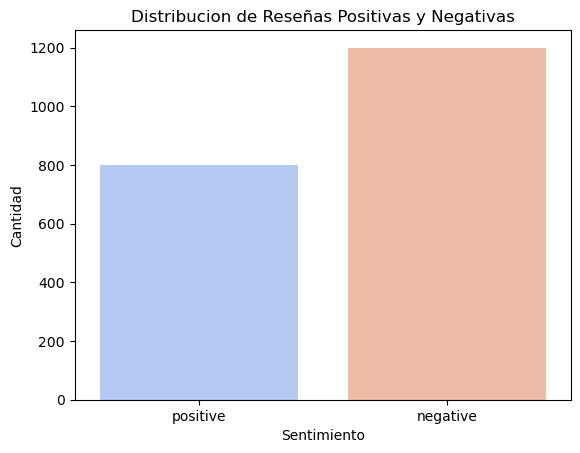

,reviews.text_esp,reviews.rating,puntaje,sentimiento,sentiment
0,Esta es una tableta muy agradable para mi novi...,5.0,1,POSITIVO,positive
1,Me encanta esta tableta. Fácil de usar. Y el p...,5.0,1,POSITIVO,positive
2,Precio asequible calidad increíble Me encanta ...,5.0,1,POSITIVO,positive
3,Compré esto después de hablar con un represent...,5.0,1,POSITIVO,positive
4,Compré esta tableta para mi hijo de 2 años y m...,5.0,1,POSITIVO,positive


In [6]:
#print(data.columns)
data['sentiment'] = data['reviews.rating'].apply(lambda x: 'positive' if x >= 4 else 'negative')

#reseñas positivas y negativas
sns.countplot(x='sentiment', data=data, palette='coolwarm')
plt.title('Distribucion de Reseñas Positivas y Negativas')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

# mapear
puntaje = {
    1 : 0,
    2: 0,
    3: 0,
    4: 1,
    5: 1
}

sentimiento = {
    0: 'NEGATIVO',
    1: 'POSITIVO'
}

# MAPEANDO
data['puntaje'] = data['reviews.rating'].map(puntaje)
data['sentimiento'] = data['puntaje'].map(sentimiento)

data.head()

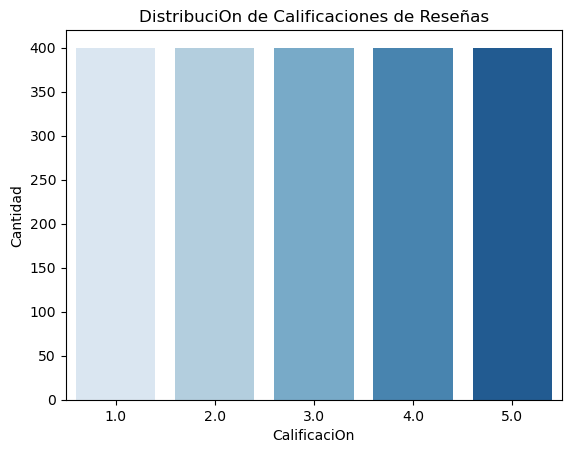

In [ ]:
sns.countplot(x='reviews.rating', data=data, palette='Blues')
plt.title('DistribuciOn de Calificaciones de Reseñas')
plt.xlabel('CalificaciOn')
plt.ylabel('Cantidad')
plt.show()

Preprocesamiento

In [ ]:
import string
import spacy
from num2words import num2words
import pandas as pd


data = data[['reviews.text_esp', 'reviews.rating']]
#print(data.head())


nlp = spacy.load('es_core_news_sm')


stop_words_adicionales = {"¿", "¡", "?", "-", "—", "httpbibliotecadigitalilceedumx"}

for palabra in stop_words_adicionales:
    nlp.Defaults.stop_words.add(palabra)


def procesar_texto(texto):
    oraciones = texto.split('\n')
    total_oraciones = len(oraciones)
    oraciones_lematizadas = []
    
    for oracion in oraciones:
        tokens = []
        doc = nlp(oracion)
        for token in doc:
            # Eliminar stop words y palabras adicionales
            if not token.is_stop and token.text not in stop_words_adicionales:
                if token.is_digit:
                    try:
                        numero = int(token.text)  # Convertir texto a número
                        palabra_letras = num2words(numero, lang='es')  # Convertir número a palabras 
                        tokens.append(palabra_letras)
                    except ValueError:
                        pass
                else:
                    lemma = token.lemma_.lower()  # Convertir a minúsculas
                    lemma_sin_puntuacion = lemma.translate(str.maketrans('', '', string.punctuation))  # Quitar puntuación
                    if lemma_sin_puntuacion and lemma_sin_puntuacion not in stop_words_adicionales:  # Evitar agregar cadenas vacías y stop words
                        tokens.append(lemma_sin_puntuacion)
        oraciones_lematizadas.append(" ".join(tokens))  # Unir tokens para formar oraciones
    
    return total_oraciones, oraciones_lematizadas


data['total_oraciones'], data['oraciones_lematizadas'] = zip(*data['reviews.text_esp'].apply(procesar_texto))


print(data[['reviews.text_esp', 'oraciones_lematizadas', 'reviews.rating']].head())


                                    reviews.text_esp  \
0  Esta es una tableta muy agradable para mi novi...   
1  Me encanta esta tableta. Fácil de usar. Y el p...   
2  Precio asequible calidad increíble Me encanta ...   
3  Compré esto después de hablar con un represent...   
4  Compré esta tableta para mi hijo de 2 años y m...   

                               oraciones_lematizadas  reviews.rating  
0                          [tableta agradable novia]             5.0  
1           [encantar tableta fácil precio correcto]             5.0  
2  [preciir asequible calidad increíble encantar ...             5.0  
3  [comprar hablar representante venta tigertown ...             5.0  
4  [comprar tableta hijo dos año perfecto juego v...             5.0  
